# 😡손글씨, 와인, 유방암 데이터 사용해서 학습하기

필요한 모듈들을 `import`한다

In [45]:
import numpy as np
import matplotlib.pyplot as plt
# load_data 함수 import
from sklearn.datasets import load_iris, load_digits, load_wine, load_breast_cancer
# estimator 5개 import
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier, LogisticRegression
# metrics 함수들 import
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

## 각 데이터의 feature 분석

### 🔢digit

숫자, 와인, 유방암 데이터가 각각 어떤 attribute 와 method 를 가지고 있는지 `dir()`함수를 사용하여 확인한다.

In [46]:
digit = load_digits()
print(dir(digit))

wine = load_wine()
print(dir(wine))

cancer = load_breast_cancer()
print(dir(cancer))

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']
['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']
['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']


각 데이터가 어떤 shape를 가지고 있는지 확인해보자  
digit은 1797 개의 손글씨 데이터이고 각각의 데이터는 8 * 8 2차원 array로 이루어져 있다

(1797, 64)


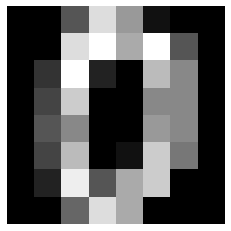

In [47]:
print(digit.data.shape)
plt.imshow(digit.data[0].reshape(8,8), cmap='gray')
plt.axis('off')
plt.show()

`target_names` 속성을 확인하면 각 라벨이 0 ~ 9 의 손글씨를 나타내는 것을 알 수있다

In [48]:
digit.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

target도 data의 개수와 똑같은 1797개가 1차원 array로 들어가있다.

In [49]:
print(len(digit.target))
digit.target[:10]

1797


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### 🍶wine

wine.data의 shape을 보면, 178 개의 데이터와 13개의 feature로 이루어짐을 확인할 수 있다.

In [50]:
wine.data.shape

(178, 13)

`wine.feature_names` 으로 feature의 이름을 확인한다.

In [51]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

`wine.target_names` 으로 label의 이름을 확인한다.

In [52]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

라벨의 개수도 데이터의 개수와 같은 178 이고 0, 1, 2 로 이루어져 있다

In [53]:
print(len(wine.target))
wine.target

178


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

### breast_cancer

유방암 데이터의 shape을 보면 569개의 데이터와 30개의 feature로 이루어져 있다

In [54]:
print(cancer.data.shape)
cancer.data[0]

(569, 30)


array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
       3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
       8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
       3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
       1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01])

`cancer.feature_names` 속성을 확인해 보면 각 feature가 무엇을 의미하는지 알려준다

In [55]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

데이터의 타겟의 이름은 malignant, benign 각각 악성과 양성을 의미한다

In [56]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

데이터와 마찬가지로 라벨도 569개의 성분을 가지는 1차원 array이다

In [57]:
cancer.target.shape

(569,)

## 데이터 별 모델 학습 및 테스트

<span style="color: red">`check_point`</span>  함수는 인자로 load_data 함수와 `train_test_split`함수에서 사용될 test_size  와 random_state 세 개의 인자를 가진다

In [58]:
def check_point(ld_fc, test_size = 0.2, random_state=7, Metrics='accuracy'):
    """
    data 와 label 에 데이터의 data, target 속성을 할당하고 이것들을 이용해 train, test set
    을 구분하고 fit_fc 안에 있는 5개의 estimator를 사용해서 학습을 진행하고 그 결과를 
    recall, accuracy 리스트에 저장하여 확인할 수 있는 함수입니다.
    또한 평가 지표로 accuracy를 사용할 것인지 recall을 사용할 것인지를 Metrics 에 할당하여 
    값을 확인할 수 있습니다.
    """
    data = ld_fc().data
    label = ld_fc().target
    
    X_train, X_test, y_train, y_test = train_test_split(data,
     label,
      test_size=test_size,
      random_state=random_state)

    fit_fc = [DecisionTreeClassifier,
     RandomForestClassifier,
      SVC,
       SGDClassifier,
        LogisticRegression]    
        
    metrics = []
    
    for i, fc in enumerate(fit_fc):
        model = fc(random_state = random_state)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        c_m = confusion_matrix(y_test, y_pred)
        if Metrics == 'accuracy':
            metrics.append(np.trace(c_m) / np.sum(c_m))
        elif Metrics == 'recall':
            metrics.append(c_m[0][0] / (c_m[0][0] + c_m[1][0]))
        else:
            raise ValueError("wrong metrics")
        print(i + 1, "th", Metrics, "is", metrics[i])


    return metrics
    
    

손글씨, 와인 분류 문제는 각 데이터를 제대로 분류하는 성능인 accuracy가 중요한 지표이다. 따라서 accuracy를 사용한다.

In [59]:
import warnings
warnings.filterwarnings("ignore")
check_point(load_digits, test_size=.1, random_state=22, Metrics='accuracy')

1 th accuracy is 0.8666666666666667
2 th accuracy is 0.9944444444444445
3 th accuracy is 0.9888888888888889
4 th accuracy is 0.95
5 th accuracy is 0.9833333333333333


[0.8666666666666667,
 0.9944444444444445,
 0.9888888888888889,
 0.95,
 0.9833333333333333]

In [60]:
check_point(load_wine, test_size=.2, random_state=2, Metrics='accuracy')

1 th accuracy is 0.9444444444444444
2 th accuracy is 1.0
3 th accuracy is 0.6944444444444444
4 th accuracy is 0.75
5 th accuracy is 0.9166666666666666


[0.9444444444444444, 1.0, 0.6944444444444444, 0.75, 0.9166666666666666]

[confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)

위 링크에 따르면 c10은 false negative  
c01 은 false positive 이다.
암 진단의 경우 true positive / (true positive + false negative)  
인 recall 값이 중요하다

In [61]:
check_point(load_breast_cancer, random_state=3, Metrics='recall')

1 th recall is 0.8333333333333334
2 th recall is 0.9024390243902439
3 th recall is 0.9411764705882353
4 th recall is 0.96875
5 th recall is 0.8947368421052632


[0.8333333333333334,
 0.9024390243902439,
 0.9411764705882353,
 0.96875,
 0.8947368421052632]

분석 결과, digit 손글씨 분류의 경우 random forest 모델로 분류했을 떄 accuracy가 0.994 로 가장 높았고 wine 분류도 마찬가지로 random forest 모델이 accuracy = 1.0 으로 가장 높았다. 유방암 진단은 SVC 모델이 가장 높은 recall값, 0.941 을 얻었다.

### 프로젝트 후 느낀점 
random_state 숫자별로 모델 별 accuracy 혹은 recall 값 차이가 매우 크게 나는 것을 볼 수 있다. 이는 train, test 데이터가 충분히 모이지 않아 발생한 문제로 보인다.

아이펠 과정 시작하고 첫 번째 익스노드인데 너무 재미있다. 이 재미를 잃지 않고 이후의 노드에도 신나게 코딩하자!